In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
! pip install -U spacy

In [26]:
!pip install gensim

In [27]:
!pip install openpyxl

In [28]:
!python3 -m spacy download en
# we are using spacy's to process the text.. they have good stuff.. for produciton.. environment...

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     |████████████████████████████████| 13.9 MB 5.6 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [29]:
! pip install pyLDAvis

In [30]:
!pip install openxly

ERROR: Could not find a version that satisfies the requirement openxly (from versions: none)
ERROR: No matching distribution found for openxly


In [31]:
import numpy as np
import pandas as pd

The same news groupd data as used last time.. 

In [32]:
df = pd.read_excel('/content/drive/MyDrive/Dataset/TopicExtraction/Pubmed5k.xlsx')


In [33]:
df.head(10)

,ArticleID,Title,Abstract
0,34153941,Stable Coordination Variability in Overground ...,Coordination variability (CV) is commonly anal...
1,34153942,Weak Hip Strength Increases Dynamic Knee Valgu...,Clinical Scenario: Dynamic knee valgus (DKV) i...
2,34153964,Current and Future Projections of Amyotrophic ...,Various methodologies have been reported to as...
3,34153968,Disparities between Asian and Non-Asian Thromb...,As outcomes for acute ischemic stroke (AIS) va...
4,34153978,Maternal Factors Predicting Loss to Follow-Up ...,Because hearing loss in children can result in...
5,34153979,Testing the feasibility and acceptability of a...,"Despite growing numbers in the USA, immigrant ..."
6,34153980,Lupus nephritis and ANCA-associated vasculitis...,Historically the treatment of lupus nephritis ...
7,34153982,Precision medicine in diabetic nephropathy and...,Progressive chronic kidney disease (CKD) in in...
8,34153983,Precision medicine in immunoglobulin A nephrop...,Immunoglobulin A nephropathy (IgAN) is the mos...
9,34153984,Precision medicine in transplantation and hemo...,"In kidney transplantation, precision medicine ..."


In [34]:
df["content"] = df["Title"] + ', ' + df["Abstract"]

In [35]:
df = df.sample(frac=1)

In [36]:
import re

def clean_text(line):
  line = re.sub(r'\s+', ' ', line.lower())
  line = re.sub(r"\'", "", line)
  line = re.sub('[,\.!?]', '', line)
  tokens = [re.sub('[^a-zA-Z0-9]+', '', t) for t in line.split()]
  tokens = [t for t in tokens if not t.isdigit()]
  tokens = [t for t in tokens if len(t)>3]
  cleaned_line = " ".join(tokens)
  return cleaned_line.strip()

<input>:6: DeprecationWarning: invalid escape sequence \.
<input>:6: DeprecationWarning: invalid escape sequence \.
<input>:6: DeprecationWarning: invalid escape sequence \.
<input>:6: DeprecationWarning: invalid escape sequence \.
<input>:6: DeprecationWarning: invalid escape sequence \.
<input>:6: DeprecationWarning: invalid escape sequence \.
<ipython-input-36-2c39549d1c6e>:6: DeprecationWarning: invalid escape sequence \.
  line = re.sub('[,\.!?]', '', line)


In [37]:
df.content = df.content.apply(lambda x: clean_text(x))

In [38]:
df.content

4456    dynamic coupling between covid19 epidemic time...
2904    effect acupuncture zusanli st36 point antral c...
1546    rapid antigen testing sarscov2 remote communit...
4106    chromosomes meiotic hemiclonal clonal polyploi...
4957    mediation model between selfesteem anxiety dep...
                              ...                        
3935    risk adverse pathological features intermediat...
57      pedagogical characteristic physical therapy sp...
770     juniperus communis extract induces cell cycle ...
2182    continuous prems proms observatory elective kn...
634     longitudinal preexposure prophylaxis prep acce...
Name: content, Length: 4999, dtype: object

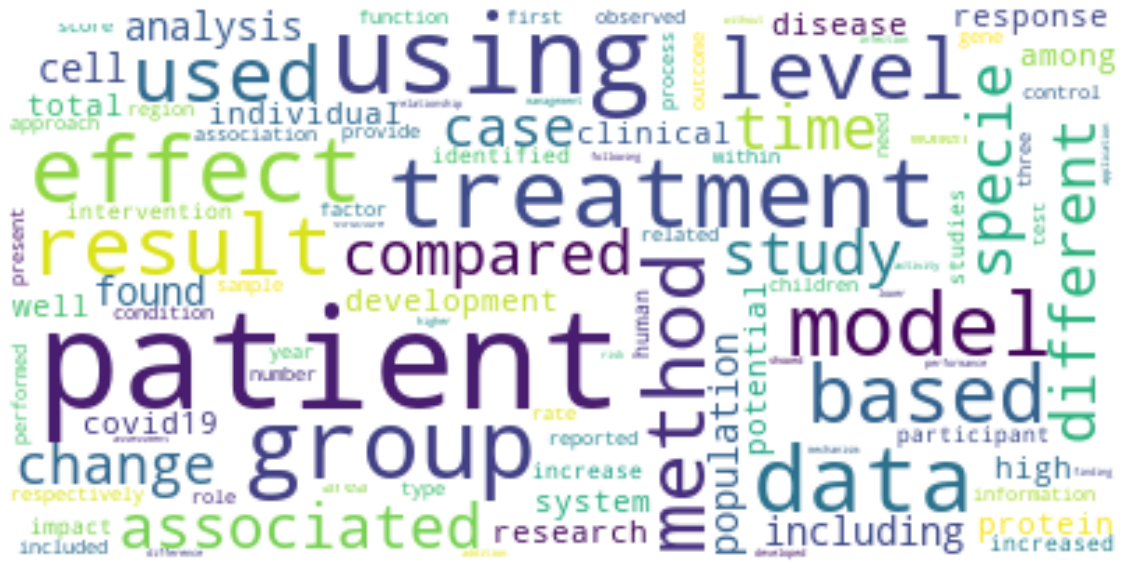

In [39]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

text = " ".join(cat for cat in df["content"])

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [40]:
from pprint import pprint

data = df.content.values.tolist()

pprint(data[:1])

['dynamic coupling between covid19 epidemic timeline behavioral response pause '
 'york state counties behavioral epidemiology suggests that there tight '
 'dynamic coupling between timeline epidemic outbreak social response affected '
 'population with typical course involving physical distancing between '
 'individuals avoidance large gatherings wearing masks study bidirectional '
 'coupling between epidemic dynamics covid19 population social response state '
 'york between march which marks first confirmed positive diagnosis state '
 'until june this window captures first statewide epidemic wave which peaked '
 'over confirmed cases daily april making york states most severely affected '
 'this first wave subsided start june count consistently under confirmed cases '
 'suggesting temporary statewide control epidemic response surge cases social '
 'distancing measures were gradually introduced over weeks march culminating '
 'with pause directive march 22nd which mandated statewide s

In [76]:
import gensim

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) 

data_words = list(sent_to_words(data))

print(data_words[:1])

[['dynamic', 'coupling', 'covid', 'epidemic', 'timeline', 'behavioral', 'response', 'state', 'county', 'behavioral', 'epidemiology', 'suggest', 'tight', 'dynamic', 'coupling', 'timeline', 'epidemic', 'outbreak', 'social', 'response', 'affect', 'population', 'typical', 'course', 'involve', 'physical', 'distancing', 'individual', 'avoidance', 'large', 'gathering', 'wear', 'mask', 'study', 'bidirectional', 'coupling', 'epidemic', 'dynamic', 'covid', 'population', 'social', 'response', 'mark', 'first', 'confirm', 'positive', 'diagnosis', 'state', 'window', 'capture', 'first', 'statewide', 'epidemic', 'wave', 'peak', 'confirm', 'case', 'daily', 'make', 'state', 'most', 'severely', 'affect', 'first', 'wave', 'subside', 'consistently', 'confirm', 'case', 'suggest', 'temporary', 'statewide', 'control', 'epidemic', 'response', 'surge', 'case', 'social', 'distancing', 'measure', 'gradually', 'introduce', 'week', 'march', 'culminate', 'pause', 'directive', 'nd', 'mandate', 'statewide', 'shutdown'

In [77]:
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def lemmatization(docs, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
  docs = [gensim.utils.simple_preprocess(x, deacc=True) for x in docs] 
  for i in range(len(docs)):
    docs[i] = nlp(" ".join(docs[i])) 
    docs[i] = " ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in docs[i] if token.pos_ in allowed_postags])
  return docs


data = [" ".join(t) for t in data_words]
data = lemmatization(data, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])


In [ ]:
print(data)

In [43]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

del data

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

def build_train_vectorizer(data):
  vectorizer = CountVectorizer(analyzer='word',       
                               min_df=20,                       
                               stop_words='english')
  
  return vectorizer.fit_transform(data), vectorizer

In [46]:
train_data_vectorized, vectorizer = build_train_vectorizer(train_data)

In [48]:
def calculate_sparsity(data_vectorized):
  data_dense = data_vectorized.todense()
  return ((data_dense > 0).sum()/data_dense.size)*100
  print("sparsity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")

In [49]:
print("sparsity: ", calculate_sparsity(train_data_vectorized), "%")

sparsity:  2.4643486305346967 %


In [50]:
from sklearn.decomposition import LatentDirichletAllocation

def build_train_lda(data_vectorized, n_components=5):
  lda_model = LatentDirichletAllocation(n_components =5,
                                      max_iter=50,               
                                      learning_method='online',   
                                      random_state=2,          
                                      batch_size = 128,
                                      evaluate_every = -1, 
                                      n_jobs = -1)
  lda_output = lda_model.fit_transform(data_vectorized)
  return lda_output, lda_model

In [51]:
lda_output, lda_model = build_train_lda(train_data_vectorized, n_components=5)
print(lda_model)

LatentDirichletAllocation(learning_method='online', max_iter=50, n_components=5,
                          n_jobs=-1, random_state=2)


In [53]:
print("Log Likelihood: ", lda_model.score(train_data_vectorized))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(train_data_vectorized))

Log Likelihood:  -2478177.7328693382
Perplexity:  975.2550610374353


In [54]:
pprint(lda_model.get_params())

{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 50,
 'mean_change_tol': 0.001,
 'n_components': 5,
 'n_jobs': -1,
 'perp_tol': 0.1,
 'random_state': 2,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


In [55]:
from sklearn.model_selection import GridSearchCV

def tune_model_grid_search(model, search_params, data_vectorized):
  grid_model = GridSearchCV(model, param_grid=search_params, verbose=10)
  grid_model.fit(data_vectorized)
  return grid_model

In [56]:
search_params = {"n_components": list(range(5, 11)), 
                 "learning_decay": list(np.arange(0.5, 1.0, 0.1))}

lda = LatentDirichletAllocation()

model = tune_model_grid_search(lda, search_params, train_data_vectorized)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5; 1/30] START learning_decay=0.5, n_components=5.........................
[CV 1/5; 1/30] END learning_decay=0.5, n_components=5;, score=-523872.257 total time=  18.0s
[CV 2/5; 1/30] START learning_decay=0.5, n_components=5.........................
[CV 2/5; 1/30] END learning_decay=0.5, n_components=5;, score=-513548.023 total time=  17.8s
[CV 3/5; 1/30] START learning_decay=0.5, n_components=5.........................
[CV 3/5; 1/30] END learning_decay=0.5, n_components=5;, score=-523019.610 total time=  18.9s
[CV 4/5; 1/30] START learning_decay=0.5, n_components=5.........................
[CV 4/5; 1/30] END learning_decay=0.5, n_components=5;, score=-512559.499 total time=  17.5s
[CV 5/5; 1/30] START learning_decay=0.5, n_components=5.........................
[CV 5/5; 1/30] END learning_decay=0.5, n_components=5;, score=-511983.075 total time=  16.9s
[CV 1/5; 2/30] START learning_decay=0.5, n_components=6.............

In [58]:
best_lda_model = model.best_estimator_
best_lda_model

LatentDirichletAllocation(n_components=5)

In [59]:
print("Best Model's Params: ", model.best_params_)
print("Best Log Likelihood Score: ", model.best_score_)
print("Model Perplexity: ", best_lda_model.perplexity(train_data_vectorized))

Best Model's Params:  {'learning_decay': 0.7, 'n_components': 5}
Best Log Likelihood Score:  -516469.0055333236
Model Perplexity:  987.0862599964574


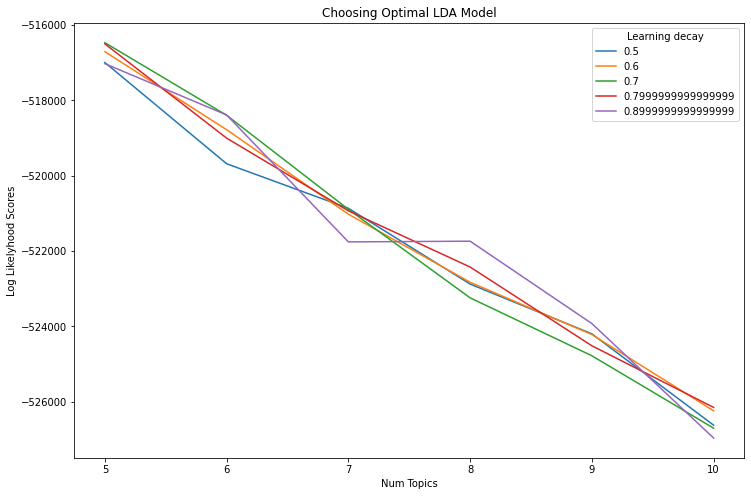

In [60]:
n_topics = list(range(5, 11))
learning_decay = list(np.arange(0.5, 1.0, 0.1))

plt.figure(figsize=(12, 8))

for d in learning_decay:
  log_likelyhoods = [round(model.cv_results_["mean_test_score"][i]) for i, x in enumerate(model.cv_results_["param_learning_decay"].data) if x==d]
  plt.plot(n_topics, log_likelyhoods, label=str(d))


plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best')
plt.show()

In [64]:
lda_output = best_lda_model.transform(train_data_vectorized)

topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)] 
docnames = ["Doc" + str(i) for i in range(len(train_data))]
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,dominant_topic
Doc0,0.030000,0.000000,0.050000,0.200000,0.720000,4
Doc1,0.880000,0.110000,0.000000,0.000000,0.000000,0
Doc2,0.000000,0.240000,0.350000,0.000000,0.410000,4
Doc3,0.000000,0.850000,0.000000,0.000000,0.140000,1
Doc4,0.000000,0.000000,0.000000,0.000000,0.990000,4
Doc5,0.000000,0.000000,0.730000,0.220000,0.040000,2
Doc6,0.110000,0.800000,0.000000,0.090000,0.000000,1
Doc7,0.000000,0.680000,0.090000,0.220000,0.000000,1
Doc8,0.000000,0.680000,0.040000,0.270000,0.000000,1
Doc9,0.000000,0.990000,0.000000,0.000000,0.000000,1


In [65]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,1,1240
1,4,850
2,3,648
3,0,647
4,2,614


In [67]:
import pyLDAvis
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(best_lda_model, train_data_vectorized, vectorizer, mds='tsne')
panel

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distan

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
4      150.222153  -72.269554       1        1  24.327052
1       51.163364 -159.968018       2        1  23.595777
2      -73.144554   21.523815       3        1  18.237904
3      -66.410133 -110.606438       4        1  17.172130
0       54.417324   12.443444       5        1  16.667137, topic_info=               Term         Freq        Total Category  logprob  loglift
1524        patient  4451.000000  4451.000000  Default  30.0000  30.0000
954          health  2143.000000  2143.000000  Default  29.0000  29.0000
1886           risk  1430.000000  1430.000000  Default  28.0000  28.0000
2021         specie  1086.000000  1086.000000  Default  27.0000  27.0000
263          cancer  1188.000000  1188.000000  Default  26.0000  26.0000
...             ...          ...          ...      ...      ...      ...
860          follow   283.346187   726.801980   Topic5  -5.3556   0.8497
1833         report   309.995554  1144.865273   Topic5  -5.2657   0.4852
1036        include   328.998602  1780.806767   Topic5  -5.2062   0.1030
1975  significantly   273.566842   798.314748   Topic5  -5.3907   0.7208
1870         result   306.299644  1801.300916   Topic5  -5.2777   0.0200

[393 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
17        1  0.991161  acceptance
18        1  0.905743      access
18        2  0.014788      access
18        3  0.044363      access
18        4  0.014788      access
...     ...       ...         ...
2357      1  0.192551        year
2357      2  0.007239        year
2357      3  0.478482        year
2357      4  0.020992        year
2357      5  0.300408        year

[906 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 3, 4, 1])

In [68]:
df_topic_keywords = pd.DataFrame(best_lda_model.components_)
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topicnames

df_topic_keywords.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abdominal,ability,able,abnormal,abnormality,absence,absolute,absorption,abstract,abundance,...,worldwide,worsen,wound,write,year,yearold,yield,young,youth,zone
Topic0,41.998704,3.989130,4.297948,6.345948,26.587373,14.633396,6.854582,0.202143,0.202617,0.200375,...,2.461114,10.382336,25.011535,0.203518,417.610859,63.780320,3.527177,78.092227,0.201362,2.662706
Topic1,6.953522,70.915214,35.472787,19.629560,3.960779,45.577901,8.803259,52.565852,4.680797,78.449875,...,43.870023,0.208096,0.209186,0.200476,10.051535,0.200969,79.039648,3.246713,0.200621,15.397863
Topic2,15.646272,0.202801,6.352084,17.632019,19.021009,25.953820,11.141083,1.819474,18.976678,0.201949,...,37.404297,28.957258,0.205676,2.068595,666.389651,5.916944,3.768919,83.922619,14.490164,0.207175
Topic3,0.201102,82.947474,40.605952,13.191631,3.229531,8.351265,17.030669,0.208050,1.604433,1.946835,...,18.834423,0.200617,32.979134,0.201749,29.284475,0.203614,46.398938,0.203165,0.202185,27.227968
Topic4,0.200400,61.945382,23.271229,0.200841,0.201308,6.483618,6.170407,0.204480,19.535475,0.200965,...,31.430144,10.251693,1.594468,44.325663,268.663480,4.898153,10.265317,120.535277,80.905668,9.504287


In [69]:
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=20)        

df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
Topic 0,patient,group,treatment,study,clinical,case,outcome,use,trial,compare,control,year,pain,month,therapy,perform,rate,include,surgery,significant
Topic 1,cell,specie,study,protein,gene,expression,use,effect,increase,result,high,analysis,level,human,activity,role,mechanism,provide,potential,identify
Topic 2,study,patient,risk,disease,covid,associate,high,year,factor,include,use,increase,mortality,child,woman,infection,prevalence,analysis,association,datum
Topic 3,use,cancer,model,method,cell,datum,result,study,analysis,network,base,detection,different,brain,test,tumor,performance,high,sample,breast
Topic 4,health,study,care,use,covid,datum,research,intervention,service,social,participant,pandemic,need,impact,include,quality,community,experience,analysis,healthcare


In [78]:

def predict_topic(text, nlp=nlp, n_topics=3): 
    #global sent_to_words
    #global lemmatization

    tmp_text = list(sent_to_words(text))
    tmp_text = [" ".join(t) for t in tmp_text]
    tmp_text = lemmatization(tmp_text, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
    tmp_text = vectorizer.transform(tmp_text)
    topic_probability_scores = best_lda_model.transform(tmp_text)
    top_topic = np.argmax(topic_probability_scores)
    top_n_topic = (-topic_probability_scores).argsort(axis=1)[:n_topics][0]
    sorted_topic_probability_scores = topic_probability_scores.copy()
    sorted_topic_probability_scores.sort(axis=1)
    sorted_topic_probability_scores = sorted_topic_probability_scores[0][::-1]
    topic_keywords = df_topic_keywords.iloc[top_topic, :].values.tolist()
    
    return top_topic, top_n_topic, sorted_topic_probability_scores, topic_probability_scores, topic_keywords

text = [test_data[0]]
top_topic, top_n_topic, sorted_topic, _, _ = predict_topic(text = text)
print(top_topic)
print(top_n_topic)
print(sorted_topic)

4
[4 3 0 2 1]
[0.59630449 0.10343778 0.10025017 0.1000071  0.10000046]


In [79]:
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD

clusters = KMeans(n_clusters=15, random_state=100).fit_predict(lda_output)

svd_model = TruncatedSVD(n_components=3) 
lda_output_svd = svd_model.fit_transform(lda_output)
x = lda_output_svd[:, 0]
y = lda_output_svd[:, 1]
z = lda_output_svd[:, 2]

print("Component's weights: \n", np.round(svd_model.components_, 2))

print("Perc of Variance Explained: \n", np.round(svd_model.explained_variance_ratio_, 2))

Component's weights: 
 [[ 0.22  0.87  0.21  0.3   0.26]
 [ 0.22 -0.42  0.31  0.11  0.82]
 [ 0.74 -0.23  0.3   0.31 -0.47]]
Perc of Variance Explained: 
 [0.11 0.3  0.22]


/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  kwargs['lwork'] = ret[-2][0].real.astype(numpy.int)
/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

No handles with labels found to put in legend.


Text(0.5, 0.92, 'Segregation of Topic Clusters')

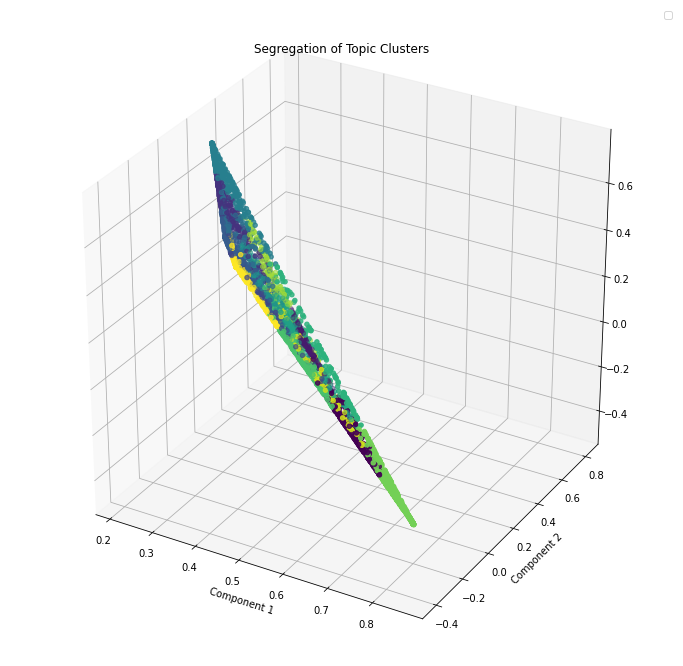

In [80]:
import pylab
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=clusters)
ax.legend()
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title("Segregation of Topic Clusters")


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


Text(0.5, 0, 'Component 2')

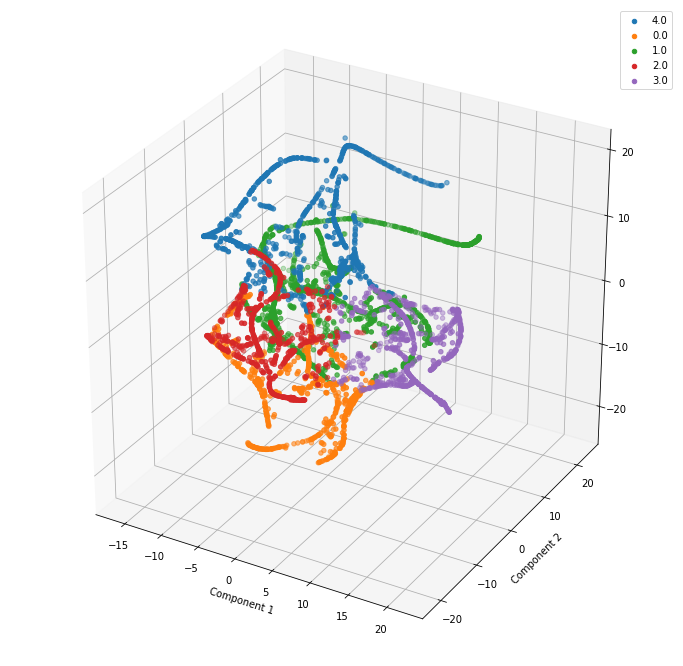

In [81]:
from sklearn.manifold import TSNE
import pylab
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


tsne = TSNE(n_components=3, random_state=0)
projections = tsne.fit_transform(lda_output)

#x, y, z = list(zip(*projections))

vis_df = projections.copy()
topics = np.argmax(lda_output, axis=1).reshape(-1,1)
vis_df = np.hstack((vis_df, topics))
vis_df = pd.DataFrame(data=vis_df, columns=['x', 'y', 'z', 
                                            'topic'])

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

for t in vis_df.topic.unique():
    ax.scatter(vis_df.x[vis_df.topic==t], 
               vis_df.y[vis_df.topic==t], 
               vis_df.z[vis_df.topic==t],
               label=t)
    
ax.legend()
plt.xlabel('Component 1')
plt.ylabel('Component 2')

In [82]:
vocab = vectorizer.get_feature_names_out()

In [83]:
def draw_word_cloud(model, vocab, index):
  imp_words_topic=""
  comp=model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure(figsize=(12, 12))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()
 

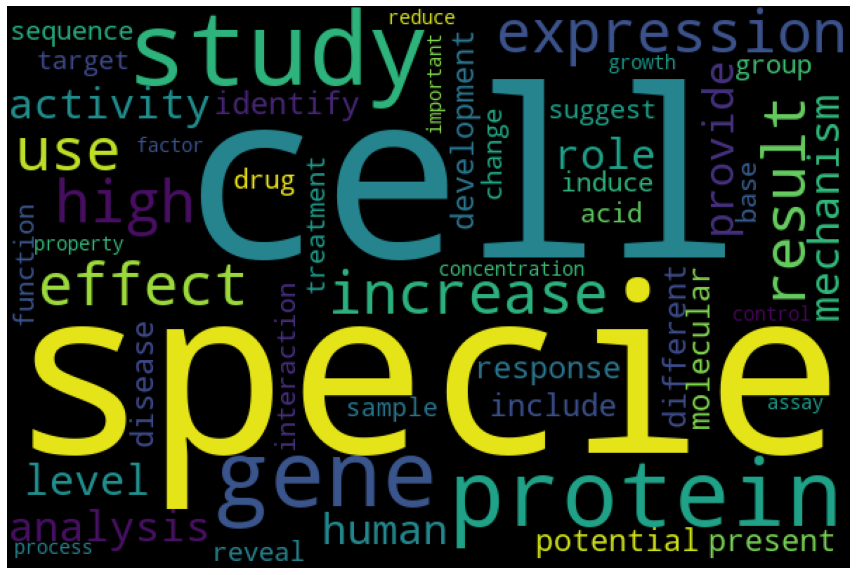

In [84]:
draw_word_cloud(best_lda_model, vocab, 1)

In [116]:
from sklearn.metrics.pairwise import euclidean_distances

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def similar_documents(text, doc_topic_probs, documents = data, nlp=nlp, top_n=5, verbose=False):
    top_topic, top_n_topic, sorted_topic_probability_scores, topic_probability_scores, _ = predict_topic(text)
    dists = euclidean_distances(topic_probability_scores.reshape(1, -1), doc_topic_probs)    
    doc_ids = np.argsort(dists[0])
    doc_ids = doc_ids[:top_n]
    if verbose:        
        print("Top Topic : ", top_topic)
        print("Top N Topic: ", top_n_topic)
        print("Topic Prob Sorted Scores of text: ", np.round(sorted_topic_probability_scores, 2))
        print("Most Similar Doc's Probs:  \n", np.round(doc_topic_probs[doc_ids], 2))
    return doc_ids, np.take(documents, doc_ids)

In [117]:
lda_output.shape

(3999, 5)

In [118]:
text = [test_data[0]]

doc_ids, docs = similar_documents(text=text, doc_topic_probs=lda_output, documents = data, top_n=3, verbose=True)
print(docs)

Top Topic :  0
Top N Topic:  [0 3 2 4 1]
Topic Prob Sorted Scores of text:  [0.64 0.36 0.   0.   0.  ]
Most Similar Doc's Probs:  
 [[0.63 0.   0.   0.36 0.  ]
 [0.66 0.   0.   0.34 0.  ]
 [0.66 0.   0.   0.33 0.  ]]
['design preliminary evaluation tongueoperate system upper limb rehabilitation devastating condition cause upper limb paralysis robotic rehabilitation selfinitiate assist movement promise technology help restore upper limb function previous study establish tongue motion use communicate human intent control rehabilitation robotassistive device goal study evaluate tongueoperate system tdska develop upper limb rehabilitation adopt tongueoperate assistive technology call tongue drive system interface also develop reach track task control different tongue operation mode train evaluation motor function reach track task test healthy participant male female year female stroke survivor upper extremity impairment year healthy successfully perform task demonstrate clinically signific